> 說明用 # 表示，若發生某些事件才需要用到則用 """ 表示

### **讀入資料**

> 可以從第一個實作複製過來

In [1]:
import pandas as pd

url = ".../chinese_science_score.csv"
data = pd.read_csv(url)

""" 若資料格式最後有一空值，就 drop 掉它
data = data.dropna(axis=1)
"""

# 顯示資料
data

,chinese,science,Unnamed: 2
0,64,93,NaN
1,78,91,NaN
2,69,84,NaN
3,52,65,NaN
4,45,78,NaN
5,48,36,NaN
6,78,77,NaN
7,75,82,NaN
8,78,92,NaN
9,32,78,NaN


### **計算 gradient descent**

> 設定 x, y（上一個實作一樣有）

In [187]:
x = data['chinese']
y = data['science']

> 計算 gradient descent

In [188]:
a = 10
b = 10

a_gradient = 2 * x * (a * x + b - y)
b_gradient = 2 * (a * x + b - y)

# 計算 平均 結果
a_gradient = (2 * x * (a * x + b - y)).sum() / len(x)
b_gradient = (2 * (a * x + b - y)).sum() / len(x)

# 介紹使用 mean()
a_gradient = (2 * x * (a * x + b - y)).mean()
b_gradient = (2 * (a * x + b - y)).mean()

a_gradient

59262.23529411765

> 包成 function 方便計算

In [189]:
def compute_gradient(x, y, a, b):
    
    a_gradient = (2 * x * (a * x + b - y)).mean()
    b_gradient = (2 * (a * x + b - y)).mean()

    return a_gradient, a_gradient

> 測試 compute_gradient()

In [190]:
compute_gradient(x, y, 10, 10)

(59262.23529411765, 59262.23529411765)

> 觀察 a, b 的變動

In [191]:
a = 0
b = 0
a_gradient, b_gradient = compute_gradient(x, y, a, b)

learning_rate = 0.0001
a = a - a_gradient * learning_rate
b = b - b_gradient * learning_rate

# 觀察 a, b 的數值
a, b

(0.7717764705882354, 0.7717764705882354)

### **觀察是否 loss 值有下降**

> loss function（上一個實作有程式碼）

In [192]:
def compute_loss(x, y, a, b):
    y_pred = a*x + b
    loss = (y - y_pred)**2
    loss = loss.sum() / len(x)

    return loss

> 觀察 loss 是否下降

In [193]:
a = 0
b = 0

# 新增這一行
print( compute_loss(x, y, a, b) )

a_gradient, b_gradient = compute_gradient(x, y, a, b)

learning_rate = 0.0001
a = a - a_gradient * learning_rate
b = b - b_gradient * learning_rate

# 新增這一行
print( compute_loss(x, y, a, b) )

5765.323529411765
1723.6007672836267


> 上面只有 1 次，現在試試看 10 次

In [196]:
a = 2
b = 10
learning_rate = 0.00001

for i in range(20):
    a_gradient, b_gradient = compute_gradient(x, y, a, b)

    a = a - a_gradient * learning_rate
    b = b - b_gradient * learning_rate

    loss = compute_loss(x, y, a, b)
    # print(f"第 {i} 次更新: Loss: {loss}, a: {a}, b: {b}")
    # print(f"第 {i} 次更新: Loss: {loss:.2f}, a: {a:.2f}, b: {b:.2f}") # 顯示兩位小數
    # print(f"第 {i:3} 次更新: Loss: {loss:.2f}, a: {a:.2f}, b: {b:.2f}") # 第幾次更新數字，占用 3 格
    print(f"第 {i:3} 次更新: Loss: {loss:.2f}, a: {a:.2f}, b: {b:.2f}, a_gradient: {a_gradient:.2f}, b_gradient: {b_gradient:.2f}") # 增加斜率

第   0 次更新: Loss: 3801.20, a: 1.94, b: 9.94, a_gradient: 6489.06, b_gradient: 6489.06
第   1 次更新: Loss: 3442.73, a: 1.87, b: 9.87, a_gradient: 6054.42, b_gradient: 6054.42
第   2 次更新: Loss: 3130.75, a: 1.82, b: 9.82, a_gradient: 5648.90, b_gradient: 5648.90
第   3 次更新: Loss: 2859.24, a: 1.77, b: 9.77, a_gradient: 5270.53, b_gradient: 5270.53
第   4 次更新: Loss: 2622.95, a: 1.72, b: 9.72, a_gradient: 4917.51, b_gradient: 4917.51
第   5 次更新: Loss: 2417.32, a: 1.67, b: 9.67, a_gradient: 4588.14, b_gradient: 4588.14
第   6 次更新: Loss: 2238.38, a: 1.63, b: 9.63, a_gradient: 4280.82, b_gradient: 4280.82
第   7 次更新: Loss: 2082.66, a: 1.59, b: 9.59, a_gradient: 3994.09, b_gradient: 3994.09
第   8 次更新: Loss: 1947.15, a: 1.55, b: 9.55, a_gradient: 3726.57, b_gradient: 3726.57
第   9 次更新: Loss: 1829.24, a: 1.52, b: 9.52, a_gradient: 3476.96, b_gradient: 3476.96
第  10 次更新: Loss: 1726.64, a: 1.48, b: 9.48, a_gradient: 3244.08, b_gradient: 3244.08
第  11 次更新: Loss: 1637.36, a: 1.45, b: 9.45, a_gradient: 3026.79, 

> 包成一個 function

In [183]:
def gradient_descent(x, y, a, b, learning_rate, loss_function, gradient_function, run_iter, show_iter):
    # 把過程中的都記錄下來
    loss_hist = []
    a_hist = []
    b_hist = []
    
    for i in range(run_iter):
        
        a_gradient, b_gradient = gradient_function(x, y, a, b)

        a = a - a_gradient * learning_rate
        b = b - b_gradient * learning_rate

        loss = loss_function(x, y, a, b)

        loss_hist.append(loss)
        a_hist.append(a)
        b_hist.append(b)

        if i%show_iter == 0:
            print(f"第 {i:3} 次更新: Loss: {loss:.2f}, a: {a:.2f}, b: {b:.2f}, a_gradient: {a_gradient:.2f}, b_gradient: {b_gradient:.2f}") # 增加斜率
    
    # 回傳 a, b 最終值、過程中的 a, b, loss
    return a, b, a_hist, b_hist, loss_hist

> 測試 function

In [186]:
a = 100
b = 100
learning_rate = 0.00005
run_iter = 50000
show_iter = 5000

a_final, b_final, a_hist, b_hist, loss_hist = gradient_descent(x, y, a, b, learning_rate, compute_loss, compute_gradient, run_iter, show_iter)

第   0 次更新: Loss: 14919829.33, a: 66.90, b: 99.49, a_gradient: 662082.24, b_gradient: 10191.59
第 5000 次更新: Loss: 846.27, a: -0.28, b: 94.09, a_gradient: -0.25, b_gradient: 16.53
第 10000 次更新: Loss: 784.98, a: -0.22, b: 90.18, a_gradient: -0.23, b_gradient: 14.80
第 15000 次更新: Loss: 735.87, a: -0.16, b: 86.67, a_gradient: -0.20, b_gradient: 13.25
第 20000 次更新: Loss: 696.50, a: -0.11, b: 83.54, a_gradient: -0.18, b_gradient: 11.86
第 25000 次更新: Loss: 664.95, a: -0.07, b: 80.73, a_gradient: -0.16, b_gradient: 10.62
第 30000 次更新: Loss: 639.67, a: -0.03, b: 78.22, a_gradient: -0.15, b_gradient: 9.50
第 35000 次更新: Loss: 619.41, a: 0.00, b: 75.97, a_gradient: -0.13, b_gradient: 8.51
第 40000 次更新: Loss: 603.17, a: 0.03, b: 73.96, a_gradient: -0.12, b_gradient: 7.62
第 45000 次更新: Loss: 590.15, a: 0.06, b: 72.15, a_gradient: -0.10, b_gradient: 6.82


> 查看最終 a 跟 b 的值

In [185]:
print(f"最終 a, b = ({a_final}, {b_final})")
# 顯示兩位小數就好
print(f"最終 a, b = ({a_final:.2f}, {b_final:.2f})")

最終 a, b = (0.03363463692051899, 73.95712198635795)
最終 a, b = (0.03, 73.96)


### **畫圖觀察 loss 趨勢**

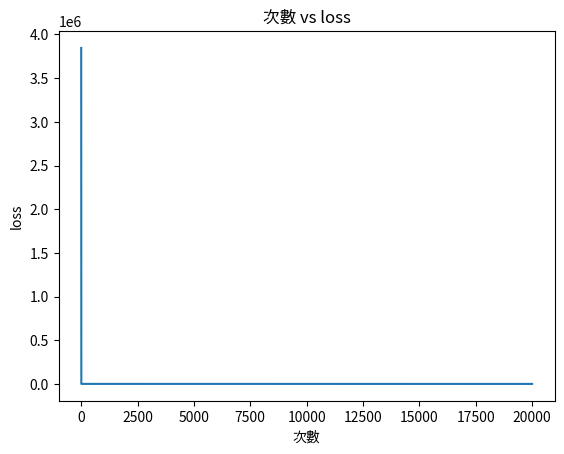

In [152]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0, run_iter), loss_hist)
# 有些人可能跟我一樣眼睛不好，所以來觀察前 100 筆（趨勢更明顯）
# plt.plot(np.arange(0, 100), loss_all[:100])

# 增加資訊
plt.title("次數 vs loss")
plt.xlabel("次數")
plt.ylabel("loss")

plt.show()

> 中文字體

In [145]:
from matplotlib.font_manager import fontManager
import matplotlib as mlp
fontManager.addfont("ChineseFont.ttf")
mlp.rc('font', family = "ChineseFont")

### **畫圖觀察 3D 的移動軌跡**

> 窮舉所有 loss 值

In [113]:
import numpy as np

a_all = np.arange(-100, 101)
b_all = np.arange(-100, 101)
loss_all = np.zeros((201, 201))

i = 0
for a in a_all:
    j = 0
    for b in b_all:
        loss = compute_loss(x, y, a, b)
        loss_all[i, j] = loss
        j = j+1
    i = i+1


> 把畫 3D 圖的程式碼複製過來

602.5
[100] [172] [0] [72]


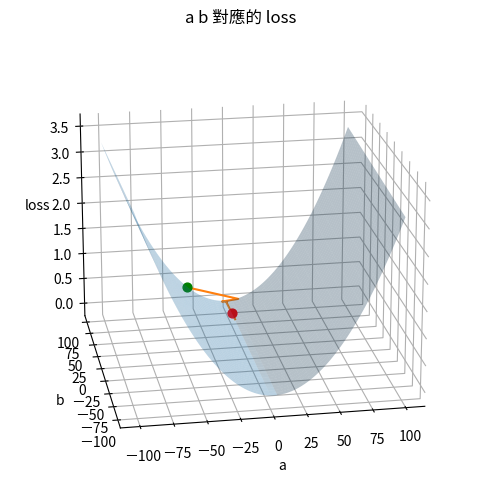

In [174]:
plt.figure(figsize=(6, 6)) # 圖片大小

ax = plt.axes(projection = "3d")
ax.view_init(20, -100) # 查看視角
ax.xaxis.set_pane_color((1, 1, 1)) # 背景顏色
ax.yaxis.set_pane_color((1, 1, 1))
ax.zaxis.set_pane_color((1, 1, 1))

b_grid, a_grid = np.meshgrid(b_all, a_all) # 網格化
#############################################   https://wangyeming.github.io/2018/11/12/numpy-meshgrid/
""" ax.plot_surface(aa, bb, loss_all) # 未網格化前 """
ax.plot_surface(a_grid, b_grid, loss_all, alpha=0.3)

# 設定資訊
ax.set_title("a b 對應的 loss")
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.set_zlabel("loss")

# 尋找 loss 最少的點
print(np.min(loss_all))
a_index, b_index = np.where(loss_all == np.min(loss_all))
print(a_index, b_index, a_all[a_index], b_all[b_index])
ax.scatter(a_all[a_index], b_all[b_index], loss_all[a_index, b_index], color="red", s=40)

ax.scatter(a_hist[0], b_hist[0], loss_hist[0], color="green", s=40)
ax.plot(a_hist, b_hist, loss_hist)

plt.show()

> 把 gradient_descent function 移下來方便操作

In [175]:
a = 100
b = 100
learning_rate = 0.0001
run_iter = 40000
show_iter = 1000

a_final, b_final, a_hist, b_hist, loss_hist = gradient_descent(x, y, a, b, learning_rate, compute_loss, compute_gradient, run_iter, show_iter)

第   0 次更新: Loss: 3845843.88, a: 33.79, b: 98.98, a_gradient: 662082.24, b_gradient: 10191.59
第 1000 次更新: Loss: 890.09, a: -0.32, b: 96.65, a_gradient: -0.27, b_gradient: 17.66
第 2000 次更新: Loss: 860.22, a: -0.29, b: 94.92, a_gradient: -0.26, b_gradient: 16.90
第 3000 次更新: Loss: 832.89, a: -0.26, b: 93.27, a_gradient: -0.25, b_gradient: 16.17
第 4000 次更新: Loss: 807.87, a: -0.24, b: 91.69, a_gradient: -0.24, b_gradient: 15.47
第 5000 次更新: Loss: 784.97, a: -0.22, b: 90.18, a_gradient: -0.23, b_gradient: 14.80
第 6000 次更新: Loss: 764.01, a: -0.19, b: 88.73, a_gradient: -0.22, b_gradient: 14.16
第 7000 次更新: Loss: 744.83, a: -0.17, b: 87.34, a_gradient: -0.21, b_gradient: 13.54
第 8000 次更新: Loss: 727.27, a: -0.15, b: 86.02, a_gradient: -0.20, b_gradient: 12.96
第 9000 次更新: Loss: 711.20, a: -0.13, b: 84.75, a_gradient: -0.19, b_gradient: 12.40
第 10000 次更新: Loss: 696.49, a: -0.11, b: 83.54, a_gradient: -0.18, b_gradient: 11.86
第 11000 次更新: Loss: 683.03, a: -0.10, b: 82.38, a_gradient: -0.17, b_gradient